In [1]:
import requests
#Calidad del aire datos en tiempo real: cada hora entre 20-30 minutos
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url) #get lo graba localmente
print(resp)

<Response [200]>


In [2]:
path = "C:\\DataSet\\"
with open (path + "horario.txt","wb") as salida:
    salida.write(resp.content)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\DataSet\\horario.txt'

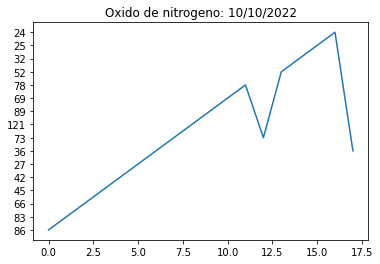

In [3]:
import matplotlib.pyplot as plt 
import csv
with open (path +'horario.txt') as arch:
    lector = csv.reader(arch,delimiter=',')
    for row in lector:
        # 0, 1, 2 = ID estatico, 3 = oxido de nitrogeno 004
        # 6, 7, 8 = anios mes dia
        # 9-56 valores del dia V/N
        if(row [0]+row[1]+row[2]=='28079004' and row[3]=='12'):
            plt.title("Oxido de nitrogeno: "+row[8]+"/"+row[7]+"/"+row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            while hora <=23:
                #+1 significa la siguiente columna
                #print(desp+2, " - ", hora+1)
                if row[desp + 2 * hora + 1]== 'V' : #V valido/N invalido
                    vs.append(row[desp+2*hora])
                    horas.append(hora)
                hora+=1
            plt.plot(horas, vs)
        plt.show()

In [4]:
print(row)

['28', '079', '060', '14', '06', '02', '2022', '10', '10', '45', 'V', '57', 'V', '54', 'V', '51', 'V', '51', 'V', '47', 'V', '35', 'V', '21', 'V', '12', 'V', '11', 'N', '18', 'V', '31', 'V', '44', 'V', '46', 'V', '56', 'V', '60', 'V', '53', 'V', '44', 'V', '0', 'N', '0', 'N', '0', 'N', '0', 'N', '0', 'N', '0', 'N']


In [12]:
print(vs)

['123', '115', '93', '74', '54', '58', '74', '126', '273', '293', '190', '74', '57', '64', '40', '23', '21', '22', '23']


In [29]:
from bs4 import BeautifulSoup
url = "C:\\DataSet\\prueba.html"
with open (url,'r') as arch:
    pag = arch.read()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\DataSet\\prueba.html'

In [15]:
sopas = BeautifulSoup(pag, "html.parser") #formato de html con el analizador sintactico parser de html
#si la pagina es compleja: html5lib
print(sopas.prettify()) 

NameError: name 'pag' is not defined

In [ ]:
import urllib.request
import bs4
#para twitter
#

In [ ]:
pagina = urllib.request.urlopen('http://www.itlalaguna.edu.mx')
html = pagina.read()
#BeautifulSoup es una biblioteca que ayuda a analizar datos en archivos html
sopa = bs4.BeautifulSoup(html, 'html5lib')

In [10]:
type(html)

bytes

In [11]:
type(sopa)

bs4.BeautifulSoup

In [12]:
print(html)

b'\xef\xbb\xbf<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<!-- Global site tag (gtag.js) - Google Analytics urbilily =UA-54252992-1 solo www-->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-54252992-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-54252992-1\');\r\n</script>\r\n<script src="https://code.jquery.com/jquery-3.5.1.min.js"\r\n        integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" crossorigin="anonymous"></script>\r\n<!-- Global site tag (gtag.js) - Google Analytics itlsitioweb UA-180691430-1  dominio itlalaguna.edu.mx -->\r\n<script async src="https://www.googletagmanager.com/gtag/js?id=UA-180691430-1"></script>\r\n<script>\r\n  window.dataLayer = window.dataLayer || [];\r\n  function gtag(){dataLayer.push(arguments);}\r\n  gtag(\'js\', new Date());\r\n\r\n  gtag(\'config\', \'UA-180691430-1\');\r

In [13]:
sopa

<!DOCTYPE html>
<html lang="en"><head>
<!-- Global site tag (gtag.js) - Google Analytics urbilily =UA-54252992-1 solo www-->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-54252992-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-54252992-1');
</script>
<script crossorigin="anonymous" integrity="sha256-9/aliU8dGd2tb6OSsuzixeV4y/faTqgFtohetphbbj0=" src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
<!-- Global site tag (gtag.js) - Google Analytics itlsitioweb UA-180691430-1  dominio itlalaguna.edu.mx -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-180691430-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-180691430-1');
</script>
<!-- Global site tag (gtag.js) - Google Analytics G-JTN8QDY5L0 lalaguna.tecnm.mx --

In [14]:
sopa.title

<title>Instituto Tecnológico de La Laguna</title>

In [15]:
type(sopa.title)

bs4.element.Tag

In [16]:
sopa.title.text

'Instituto Tecnológico de La Laguna'

In [17]:
sopa.body.text

'\n    \n\n/*     $(\'.dropdown-menu a.dropdown-toggle\').on(\'click\', function(e) {\n        if (!$(this).next().hasClass(\'show\')) {\n            $(this).parents(\'.dropdown-menu\').first().find(\'.show\').removeClass(\'show\');\n        }\n        var $subMenu = $(this).next(\'.dropdown-menu\');\n        $subMenu.toggleClass(\'show\');\n\n\n        $(this).parents(\'li.nav-item.dropdown.show\').on(\'hidden.bs.dropdown\', function(e) {\n            $(\'.dropdown-submenu .show\').removeClass(\'show\');\n        });\n\n \n        return false;\n    }); */\n\n\n\n\n    a {\n        color: white !important;\n        font-size: large;\n    }\n\n    @media (min-width: 960px) {\n        .dropdown:hover>.dropdown-menu {\n            display: block;\n        }\n\n        \n    }\n\n    .dropdown-submenu {\n        position: relative;\n    }\n\n    .dropdown-submenu a::after {\n        transform: rotate(-90deg);\n        position: absolute;\n        right: 6px;\n        top: .8em;\n    }\n\n

In [18]:
lista = sopa.body.select('div')

In [19]:
print(lista)

[<div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav mr-auto">
            <li class="nav-item active">
                <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
            </li>

        </ul>
        <ul class="navbar-nav" style="margin-right: 10%;">
            <li class="nav-item">
                <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
            </li>

            <li class="nav-item">
                <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
            </li>

            <li class="nav-item">
                <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
            </li>

            <li class="nav-item">
                <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
                    <span class="sr-only">Búsqueda</span>
          

In [20]:
lista[0]

<div class="collapse navbar-collapse" id="navbarNav">
        <ul class="navbar-nav mr-auto">
            <li class="nav-item active">
                <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
            </li>

        </ul>
        <ul class="navbar-nav" style="margin-right: 10%;">
            <li class="nav-item">
                <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
            </li>

            <li class="nav-item">
                <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
            </li>

            <li class="nav-item">
                <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
            </li>

            <li class="nav-item">
                <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
                    <span class="sr-only">Búsqueda</span>
           

In [21]:
[e for e in lista]

[<div class="collapse navbar-collapse" id="navbarNav">
         <ul class="navbar-nav mr-auto">
             <li class="nav-item active">
                 <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
             </li>
 
         </ul>
         <ul class="navbar-nav" style="margin-right: 10%;">
             <li class="nav-item">
                 <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
                     <span class="sr-only">Búsq

In [22]:
len(lista)

94

In [23]:
nueva = [e for e in lista]

In [24]:
len(nueva)

94

In [26]:
sopa.find_all("div")

[<div class="collapse navbar-collapse" id="navbarNav">
         <ul class="navbar-nav mr-auto">
             <li class="nav-item active">
                 <a class="nav-link" href="#"> <span class="sr-only">(current)</span></a>
             </li>
 
         </ul>
         <ul class="navbar-nav" style="margin-right: 10%;">
             <li class="nav-item">
                 <a class="nav-link" href="https://www.gob.mx/gobierno" style="color: white;"> Gobierno</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-link" href="https://www.gob.mx/participa" style="color: white;">Participa</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-link" href="https://datos.gob.mx " style="color: white;">Datos</a>
             </li>
 
             <li class="nav-item">
                 <a class="nav-item nav-link active" href="https://www.gob.mx/busqueda" style="color: white;">
                     <span class="sr-only">Búsq

In [27]:
sopa.find_all("img")

[<img alt="Página de inicio, Gobierno de México" height="33" src="https://framework-gb.cdn.gob.mx/landing/img/logoheader.svg" style=" margin-left: 80%;"/>,
 <img alt="Gobierno de México" src="img/logotipos/pleca-gob1.png" style="width:30%;height:auto"/>,
 <img alt="Educación" src="img/logotipos/pleca-gob2.png" style="width:30%;height:auto; min-width:auto;"/>,
 <img alt="TecNM" src="img/logotipos/pleca_tecnm.jpg" style="width:18%;height:auto; "/>,
 <img alt="ITL" src="img/logotipos/itl2.jpeg" style="width:7%; height:auto;"/>,
 <img alt="Inglés" src="img/logotipos/usa-icono.png" style="width:20%; height:auto; display:inline-block" title="Inglés"/>,
 <img alt="Español" src="img/logotipos/mexico-icono.png" style="width:20%; height:auto; display:inline-block" title="Español"/>,
 <img alt="Francés" src="img/logotipos/francia-icono.png" style="width:20%; height:auto; display:inline-block" title="Francés"/>,
 <img alt="Alemán" src="img/logotipos/alemania-icono.png" style="width:20%; height:aut

In [7]:
sopa.find("body")

NameError: name 'sopa' is not defined

In [6]:
#Pagina de clima
import requests
from bs4 import BeautifulSoup
pagina = requests.get("https://forecast.weather.gov/MapClick.php?lat=29.633&lon=-95.6007")
soup = BeautifulSoup(pagina.content, "html.parser")
dias = soup.find(id = "seven-day-forecast")
forecast_items = dias.find_all(class_="tombstone-container")
actual = forecast_items[0]
print(actual.prettify())

AttributeError: 'NoneType' object has no attribute 'find_all'

In [34]:
forecast_items
#nombre del item :HOY
#descripcion
#condiciones
#temperatura

[<div class="tombstone-container">
 <p class="period-name">This<br/>Afternoon</p>
 <p><img alt="This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. " class="forecast-icon" src="newimages/medium/few.png" title="This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. "/></p><p class="short-desc">Sunny</p><p class="temp temp-high">High: 90 °F</p></div>,
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Mostly clear, with a low around 66. Southeast wind around 5 mph becoming calm  in the evening. " class="forecast-icon" src="newimages/medium/nfew.png" title="Tonight: Mostly clear, with a low around 66. Southeast wind around 5 mph becoming calm  in the evening. "/></p><p class="short-desc">Mostly Clear</p><p class="temp temp-low">Low: 66 °F</p></div>,
 <div class="tombstone-container">
 <p class="period-name">Thursday<br/><br/></p>
 <p><img alt="Thursday: Sunny, with a high near 92. North wind around

In [35]:
hoy = actual. find(class_ = "period-name").get_text()
descripcion = actual.find(class_="short-desc").get_text()
temp = actual.find(class_="temp").get_text()
print(hoy)
print(descripcion)
print(temp)

ThisAfternoon
Sunny
High: 90 °F


In [36]:
dias

<div class="panel panel-default" id="seven-day-forecast">
<div class="panel-heading">
<b>Extended Forecast for</b>
<h2 class="panel-title">
                Sugar Land TX    </h2>
</div>
<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">This<br/>Afternoon</p>
<p><img alt="This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. " class="forecast-icon" src="newimages/medium/few.png" title="This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. "/></p><p class="short-desc">Sunny</p><p class="temp temp-high">High: 90 °F</p></div></li><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: Mostly clear, with a low around 66. Southeast wind around 5 mph becoming calm  in the evening. " class="foreca

In [37]:
imagenHOY = actual.find("img")
describe = imagenHOY["title"]
print(describe)

This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. 


In [38]:
print(imagenHOY)

<img alt="This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. " class="forecast-icon" src="newimages/medium/few.png" title="This Afternoon: Sunny, with a high near 90. Northeast wind around 5 mph. "/>


In [39]:
tags = dias.select(".tombstone-container .period-name")
semana = [i.get_text() for i in tags]
semana

['ThisAfternoon',
 'Tonight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday',
 'SaturdayNight',
 'Sunday']

In [40]:
tags

[<p class="period-name">This<br/>Afternoon</p>,
 <p class="period-name">Tonight<br/><br/></p>,
 <p class="period-name">Thursday<br/><br/></p>,
 <p class="period-name">Thursday<br/>Night</p>,
 <p class="period-name">Friday<br/><br/></p>,
 <p class="period-name">Friday<br/>Night</p>,
 <p class="period-name">Saturday<br/><br/></p>,
 <p class="period-name">Saturday<br/>Night</p>,
 <p class="period-name">Sunday<br/><br/></p>]

In [41]:
descripciones = [d.get_text() for d in dias.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in dias.select(".tombstone-container .temp")]
Ddescripciones = [d["title"] for d in dias.select("tombstone-container img")]
print(descripciones)
print(temps)
print(Ddescripciones)

['Sunny', 'Mostly Clear', 'Sunny', 'Partly Cloudy', 'Partly Sunny', 'Mostly Cloudy', 'Mostly Sunny', 'Partly Cloudy', 'Sunny']
['High: 90 °F', 'Low: 66 °F', 'High: 92 °F', 'Low: 67 °F', 'High: 93 °F', 'Low: 70 °F', 'High: 91 °F', 'Low: 66 °F', 'High: 87 °F']
[]


In [1]:
import pandas as pd
pronostico = pd.DataFrame({"Dia":semana,"Descripcion":descripciones,"Temperatura":temps,"Detalle":Ddescripciones})
pronostico

NameError: name 'semana' is not defined

In [46]:
solo_temp = pronostico["Temperatura"].str.extract("(?P<temp_num>\d+)", expand=False)
pronostico["temp_num"] = solo_temp.astype('int')#CONVIERTO A INT Y AGREGAR AL DF
solo_temp

NameError: name 'pronostico' is not defined

In [ ]:
pronostico

In [26]:
pronostico["temp_num"].mean()

NameError: name 'pronostico' is not defined

In [27]:
#Los dias que en la niche tengan esa temperatura o
#esten en el rango de esa temperatura
noche = pronostico["Temperatura"].str.contains("Low")#noche
pronostico["noche"] = noche
noche

NameError: name 'pronostico' is not defined

In [28]:
pronostico

NameError: name 'pronostico' is not defined

In [30]:
pronostico[noche]

NameError: name 'pronostico' is not defined

In [2]:
from selenium import webdriver

In [3]:
webdriver.Edge("C:\\Users\\maxam\\Documents\\WebDriver\\msedgedriver.exe")#.Firefox()

C:\Users\maxam\AppData\Local\Temp/ipykernel_19228/4046631309.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  webdriver.Edge("C:\\Users\\maxam\\Documents\\WebDriver\\msedgedriver.exe")#.Firefox()


<selenium.webdriver.edge.webdriver.WebDriver (session="85bde101c3052db531631905e869a6ea")>

In [4]:
browser = webdriver.Edge("C:\\Users\\maxam\\Documents\\WebDriver\\msedgedriver.exe")#Firefox()
browser.get("http://www.google.com")

C:\Users\maxam\AppData\Local\Temp/ipykernel_19228/697911056.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Edge("C:\\Users\\maxam\\Documents\\WebDriver\\msedgedriver.exe")#Firefox()


In [7]:
#Datos que requieren interaccion
#Selenium fue creada para hacer testing y despues se utilizo para web scraping
#
from selenium import webdriver
browser = webdriver.Firefox()
#browser.get("http://www.yahoo.com")
browser.get("https://forecast.weather.gov/MapClick.php?lat=29.633&lon=-95.6007")
print(browser.title)

WebDriverException: Message: 'geckodriver' executable needs to be in PATH. 


In [8]:
#Escribir en la caja de texto una ciudad, p.e. Austin TX
browser.find_element_by_id("btnSearch").click()

NameError: name 'browser' is not defined

In [9]:
go = browser.find_element_by_id("inputstring")
ciudad = "Houston, TX"
go.send_keys(ciudad)

NameError: name 'browser' is not defined

In [11]:
browser.find_element_by_id("btnSearch").click()

NameError: name 'browser' is not defined

In [12]:
browser.quit()

NameError: name 'browser' is not defined

#Recoleccion por medio de apis api (application programming interface) es una biblioteca, un conjunto de funciones que ofrece una cierta aplicacion para ser accesada por otra. API Twitter: tweppy modo streaming API REST(Representacional State Transfer, transferencia de estado represenatacional) es un metodo sencillo para recibir y enviar datos en cualquier formato XML. JSON Para ello se utilizan funciones POST GET PUT DELETE

In [1]:
#Utilizando Api de google maps
import requests
GOOGLE_MAPS_API_URL = "http://maps.googleapis.com/maps/api/geocode/json"
params = dict(origin = "Torreon, Mexico", destination = "Monterrey, Mexico", mode = "driving")
resp = requests.get(GOOGLE_MAPS_API_URL, params = params)
print(resp)

<Response [200]>
